In [1]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
from time import time
from torchviz import make_dot
import numpy as np

In [27]:
def plot_mnist_number(img):
    plt.imshow(img.numpy().squeeze(), cmap='gray', interpolation='none')

def plot_loss(loss, title):
    plt.plot(loss)
    plt.xlabel("Number of Epoch")
    plt.ylabel("Loss")
    plt.title(title)
    plt.show()

In [245]:
input_size = 784
hidden_sizes = [256, 64]
output_size = 10
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim = 1))
print(model)

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5,), (0.5,)),])

testset = torchvision.datasets.MNIST('./', train=False, download=True, transform=transform)
trainset = torchvision.datasets.MNIST('./', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.8)
images, labels = next(iter(trainloader))  
time0 = time()
epochs = 15
training_loss_array = []
validation_loss_array = []
correct_classifications = 0
total_classifications = 0

for e in range(epochs):

    running_loss_train = 0
    running_loss_test = 0
    

    for images, labels in trainloader:
      images = images.view(images.shape[0], -1)
      optimizer.zero_grad()          
      output = model(images)
      loss = criterion(output, labels)
      
      #backprop
      loss.backward()
      
      #adjust weights
      optimizer.step()
      
      running_loss_train += loss.item()
      training_loss = running_loss_train/len(trainloader)
    else:
        print(f"Epoch {e} - Training loss: {training_loss}")        
        training_loss_array.append(training_loss)

    with torch.no_grad():
      for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()          
        output = model(images)
        loss = criterion(output, labels)
        
        running_loss_test += loss.item()
        validation_loss = running_loss_test/len(testloader)

        total_classifications += labels.size(0)        
        
        for (expected_digit, predicted_digit) in zip(labels.numpy(), np.argmax(torch.exp(output).numpy(), axis=1)):            
            if (expected_digit == predicted_digit):
                correct_classifications += 1
      else:
          print(f"Epoch {e} - Validation loss: {validation_loss}")        
          validation_loss_array.append(validation_loss)
    

print("\nTraining Time (in minutes) =",(time()-time0)/60)  
print(f"Accuracy: {100*correct_classifications/total_classifications}%")

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
Epoch 0 - Training loss: 0.6496067253961358
Epoch 0 - Validation loss: 0.31378758087683234
Epoch 1 - Training loss: 0.36960523877483936
Epoch 1 - Validation loss: 0.2509528225171824
Epoch 2 - Training loss: 0.2983957596837551
Epoch 2 - Validation loss: 0.22778984790718732
Epoch 3 - Training loss: 0.24306918505379405
Epoch 3 - Validation loss: 0.3516410694914924
Epoch 4 - Training loss: 0.21767586137918798
Epoch 4 - Validation loss: 0.15272031048392165
Epoch 5 - Training loss: 0.19791612376061934
Epoch 5 - Validation loss: 0.14766192370438672
Epoch 6 - Training loss: 0.18179181439234982
Epoch 6 - Validation loss: 0.1583425685032479
Epoch 7 - Training loss: 0.17634212479902917
Epoch 7 - Validation loss: 0.13281158045697145
Epoch 8 - Training loss: 

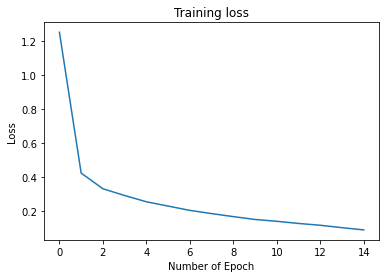

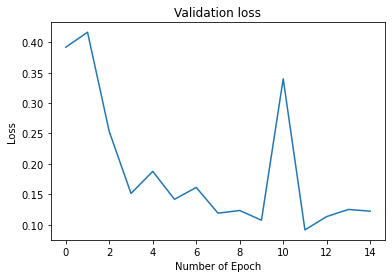

In [214]:
plot_loss(running_loss_array, "Training loss")
plot_loss(validation_loss_array, "Validation loss")

Predicted Digit = 3


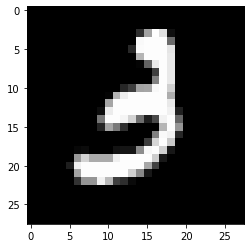

In [218]:
images, labels = next(iter(testloader))
img = images[0].view(1, 784)

with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
probabilities_np_matrix = torch.exp(logps).numpy()

print("Predicted Digit =", np.argmax(probabilities_np_matrix, axis=1)[0])

plot_mnist_number(img.view(1, 28, 28))